In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense




In [4]:

# Load the data from the CSV file
df = pd.read_csv('/content/Kidney_data.csv')

# Drop the rows with missing values
df = df.dropna(axis=0)


In [5]:
df.shape
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [70]:
#Transform the non numeric data in the columns
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  else:
    df[column]=LabelEncoder().fit_transform(df[column])
print(df)

      id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  pcv  wc  rc  \
3      0  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...   11  42  14   
9      1  53.0  90.0  1.020  2.0  0.0    0   0    1   0  ...    8  11  12   
11     2  63.0  70.0  1.010  3.0  0.0    0   0    1   0  ...   11  25  13   
14     3  68.0  80.0  1.010  3.0  2.0    1   0    1   1  ...    0   8   2   
20     4  61.0  80.0  1.015  2.0  0.0    0   0    0   0  ...    4  63   7   
..   ...   ...   ...    ...  ...  ...  ...  ..  ...  ..  ...  ...  ..  ..   
395  153  55.0  80.0  1.020  0.0  0.0    1   1    0   0  ...   25  42  23   
396  154  42.0  70.0  1.025  0.0  0.0    1   1    0   0  ...   32  52  36   
397  155  12.0  80.0  1.020  0.0  0.0    1   1    0   0  ...   27  41  28   
398  156  17.0  60.0  1.025  0.0  0.0    1   1    0   0  ...   29  47  33   
399  157  58.0  80.0  1.025  0.0  0.0    1   1    0   0  ...   31  43  35   

     htn  dm  cad  appet  pe  ane  classification  
3      1   0    0      

<ipython-input-70-cf55da055d12>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-70-cf55da055d12>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-70-cf55da055d12>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-70-cf55da055d12>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-70-cf55da055d12>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. Th

In [7]:
print(df)

      id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  pcv  wc  rc  \
3      0  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...   11  42  14   
9      1  53.0  90.0  1.020  2.0  0.0    0   0    1   0  ...    8  11  12   
11     2  63.0  70.0  1.010  3.0  0.0    0   0    1   0  ...   11  25  13   
14     3  68.0  80.0  1.010  3.0  2.0    1   0    1   1  ...    0   8   2   
20     4  61.0  80.0  1.015  2.0  0.0    0   0    0   0  ...    4  63   7   
..   ...   ...   ...    ...  ...  ...  ...  ..  ...  ..  ...  ...  ..  ..   
395  153  55.0  80.0  1.020  0.0  0.0    1   1    0   0  ...   25  42  23   
396  154  42.0  70.0  1.025  0.0  0.0    1   1    0   0  ...   32  52  36   
397  155  12.0  80.0  1.020  0.0  0.0    1   1    0   0  ...   27  41  28   
398  156  17.0  60.0  1.025  0.0  0.0    1   1    0   0  ...   29  47  33   
399  157  58.0  80.0  1.025  0.0  0.0    1   1    0   0  ...   31  43  35   

     htn  dm  cad  appet  pe  ane  classification  
3      1   0    0      

In [8]:
#Split the  data into independent (X) dataset and independent (y) dataset
X=df.drop(['classification'], axis=1).values
y=df['classification']

In [9]:
X.shape

(158, 25)

In [10]:
X = np.reshape(X, (X.shape[0], 25, 1))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [12]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(25, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [13]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 2s 80ms/step - loss: 3.2197 - accuracy: 0.6091 - val_loss: 0.7964 - val_accuracy: 0.8542
Epoch 2/10
7/7 [==============================] - 0s 28ms/step - loss: 1.4991 - accuracy: 0.7818 - val_loss: 0.7005 - val_accuracy: 0.8542
Epoch 3/10
7/7 [==============================] - 0s 23ms/step - loss: 0.3133 - accuracy: 0.9091 - val_loss: 0.0805 - val_accuracy: 0.9792
Epoch 4/10
7/7 [==============================] - 0s 23ms/step - loss: 0.2147 - accuracy: 0.9364 - val_loss: 0.1592 - val_accuracy: 0.9375
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.1721 - accuracy: 0.9455 - val_loss: 0.0574 - val_accuracy: 0.9792
Epoch 6/10
7/7 [==============================] - 0s 16ms/step - loss: 0.0672 - accuracy: 0.9909 - val_loss: 0.1157 - val_accuracy: 0.9792
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0851 - accuracy: 0.9727 - val_loss: 0.0939 - val_accuracy: 0.9792
Epoch 8/10
7/7 [===========

2/2 [==============================] - 0s 5ms/step
[1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 0 1]
368    1
252    1
374    1
398    1
317    1
189    0
326    1
329    1
325    1
382    1
130    0
263    1
92     0
281    1
157    0
190    0
360    1
344    1
321    1
275    1
392    1
128    0
84     0
71     0
196    0
304    1
258    1
380    1
364    1
388    1
387    1
291    1
377    1
262    1
366    1
307    1
396    1
249    0
278    1
355    1
171    0
376    1
298    1
391    1
225    0
292    1
147    0
373    1
Name: classification, dtype: int64
Accuracy: 0.9791666666666666
Confusion matrix:
 [[12  1]
 [ 0 35]]


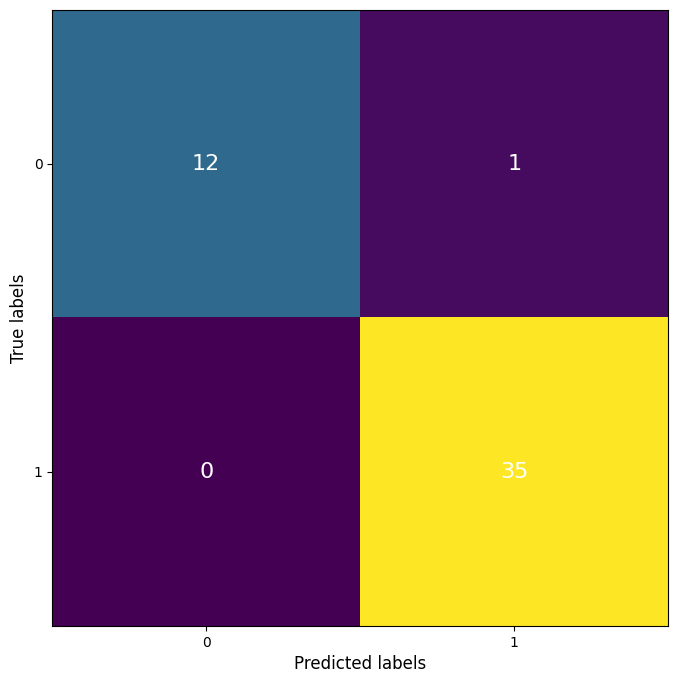

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predict classes for test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)
print(y_test)
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)
print("Confusion matrix:\n", conf_mat)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat)
ax.grid(False)
ax.set_xlabel('Predicted labels', fontsize=12, color='black')
ax.set_ylabel('True labels', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1))
ax.yaxis.set(ticks=(0, 1))
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='white', fontsize=16)
plt.show()

Repeating the experiment again with the missing values

In [143]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [144]:
df_2 = pd.read_csv('/content/Kidney_data.csv')
df_2.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [145]:

B= df_2['classification'].replace({'ckd': 0, 'notckd': 1})



In [146]:
'''
for col in df_2.columns:
    if df_2[col].dtype == object:
        df_2[col] = pd.Categorical(df_2[col]).codes
print(df_2)
'''
#Transform the non numeric data in the columns
for column in df_2.columns:
  if df_2[column].dtype==np.number:
    continue
  else:
    df_2[column]=LabelEncoder().fit_transform(df_2[column])


<ipython-input-146-83a393905147>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_2[column].dtype==np.number:
<ipython-input-146-83a393905147>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_2[column].dtype==np.number:
<ipython-input-146-83a393905147>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_2[column].dtype==np.number:
<ipython-input-146-83a393905147>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_2[column].dtype==np.number:
<ipython-input-146-83a393905147>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is d

In [147]:
gnb = GaussianNB()

In [148]:
for col in df_2.columns:
    if df_2[col].isna().sum() > 0:
        mask = df_2[col].isna()
        train_data = df_2.loc[~mask].dropna(axis=1)
        test_data = df_2.loc[mask, train_data.columns]
        train_target = train_data[col]
        mean = train_target.mean()
        std = train_target.std()
        train_target_cat = pd.cut(train_target, bins=[-np.inf, mean-std, mean+std, np.inf], labels=[0,1,2])
        
        train_data = train_data.drop(columns=[col])
        test_data = test_data.drop(columns=[col])
        imputed_values = gnb.fit(train_data, train_target_cat).predict(test_data)
        df_2.loc[mask, col] = imputed_values
df_2.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [149]:
df_2['classification'].head(400)

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: classification, Length: 400, dtype: int64

In [165]:
# Split the data into training and testing sets
A = df_2.drop(columns=['classification'], axis=1).values
B = df_2['classification']


A = np.reshape(A, (A.shape[0], 25, 1))

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3)

print(B.dtype)


int64


In [158]:
print(A_train)

[[[313.]
  [ 55.]
  [ 80.]
  ...
  [  0.]
  [  0.]
  [  0.]]

 [[ 63.]
  [ 46.]
  [ 70.]
  ...
  [  0.]
  [  0.]
  [  1.]]

 [[180.]
  [ 73.]
  [ 90.]
  ...
  [  0.]
  [  0.]
  [  0.]]

 ...

 [[312.]
  [ 80.]
  [ 70.]
  ...
  [  0.]
  [  0.]
  [  0.]]

 [[195.]
  [ 70.]
  [ 90.]
  ...
  [  1.]
  [  0.]
  [  0.]]

 [[168.]
  [ 65.]
  [ 70.]
  ...
  [  0.]
  [  0.]
  [  0.]]]


In [168]:
# Build the model
# Define the CNN model
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(25, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(3, activation='softmax'))
# Compile the model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [169]:
# Train the model

model1.fit(A_train, B_train, epochs=10, batch_size=16, validation_data=(A_test, B_test))


Epoch 1/10
18/18 [==============================] - 1s 21ms/step - loss: 2.1801 - accuracy: 0.7571 - val_loss: 0.7712 - val_accuracy: 0.9083
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5500 - accuracy: 0.8786 - val_loss: 0.5608 - val_accuracy: 0.9083
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.9321 - val_loss: 0.4080 - val_accuracy: 0.9250
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2515 - accuracy: 0.9643 - val_loss: 0.3365 - val_accuracy: 0.9250
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.9464 - val_loss: 0.3681 - val_accuracy: 0.9333
Epoch 6/10
18/18 [==============================] - 0s 6ms/step - loss: 0.1924 - accuracy: 0.9643 - val_loss: 0.2448 - val_accuracy: 0.9417
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 0.1721 - accuracy: 0.9607 - val_loss: 0.2359 - val_accuracy: 0.9500
Epoch 8/10
18/18 [=

In [170]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predict classes for test set
y_pred = model1.predict(A_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# Compute accuracy
accuracy = accuracy_score(B_test, y_pred_classes)
print("Accuracy:", accuracy)

# Compute confusion matrix
conf_mat = confusion_matrix(B_test, y_pred_classes)
print("Confusion matrix:\n", conf_mat)


4/4 [==============================] - 0s 3ms/step
Accuracy: 0.9416666666666667
Confusion matrix:
 [[68  6]
 [ 1 45]]
